# Datascience Project

In [1]:
from IPython.display import Image
from collections import Counter
from scipy.stats import pearsonr

import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline 

import seaborn as sns

# Content

This notebook studied the TMDb dataset.

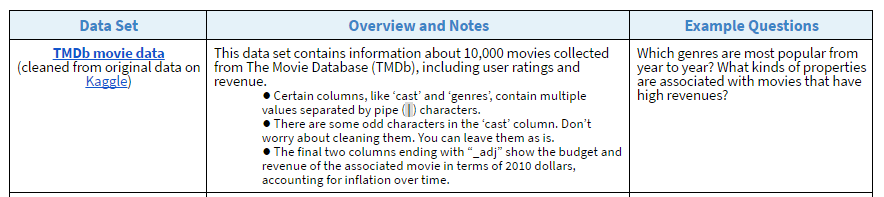

In [2]:
Image("TMDb movie data info.PNG")

## Functions

In [3]:
def split_list(the_list_to_split, character):
    
    """
    This function split a list given a character. 

    :param the_list_to_split: the list we like to split
    :param character: the character that dividing the string
    
    :return: the splitted list
    """
    
    the_list = []
    for i in range(0,len(the_list_to_split)):
        # Note: Why use str? I get a an error if there is nan as genre
        the_list.append(str(the_list_to_split[i]).split(character)) 
    
    # Flatten the list 
    # ref. https://stackoverflow.com/questions/20112776/how-do-i-flatten-a-list-of-lists-nested-lists
    flatten_list = sum(the_list, [])
    
    the_list = []
    for element in flatten_list:
        if element not in the_list:
            the_list.append(element)
    
    return(the_list)

## Exploring the data

Import the dataset and print the first 3 lines of the dataframe.

In [4]:
tmdb_df=pd.read_csv('tmdb-movies.csv')
tmdb_df.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


The column header:

In [5]:
print(list(tmdb_df.columns.values))

['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title', 'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview', 'runtime', 'genres', 'production_companies', 'release_date', 'vote_count', 'vote_average', 'release_year', 'budget_adj', 'revenue_adj']


### Question: Which director generate the max. revenue?

The goal is to investigate which director generates the max. revenue.

Extract the top 10 based on revenue.

In [6]:
# perform split
director_list = split_list(tmdb_df['director'],"|")
# print first 10 actors of the list.
print("Total directors in the dataset",len(director_list),"the first 10 are:")
print(director_list[0:10])

Total directors in the dataset 5363 the first 10 are:
['Colin Trevorrow', 'George Miller', 'Robert Schwentke', 'J.J. Abrams', 'James Wan', 'Alejandro GonzÃ¡lez IÃ±Ã¡rritu', 'Alan Taylor', 'Ridley Scott', 'Kyle Balda', 'Pierre Coffin']


In [7]:
tmdb_df_revenue = tmdb_df.groupby('director')['revenue'].sum()
top10_director_by_revenue = tmdb_df_revenue.sort_values(ascending=False).head(10)
top10_director_by_revenue

director
Steven Spielberg     9018563772
Peter Jackson        6523244659
James Cameron        5841894863
Michael Bay          4917208171
Christopher Nolan    4167548502
David Yates          4154295625
Robert Zemeckis      3869690869
Chris Columbus       3851491668
Tim Burton           3665414624
Ridley Scott         3649996480
Name: revenue, dtype: int64

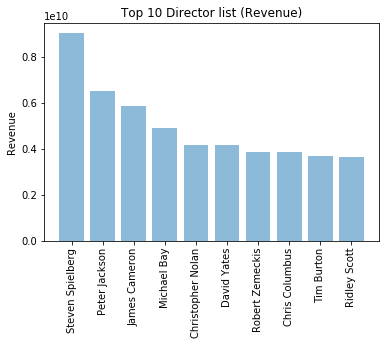

In [8]:
director = (top10_director_by_revenue.index)
y_pos = np.arange(len(director))
x_pos = list(top10_director_by_revenue)
 
plt.bar(y_pos, x_pos, align='center', alpha=0.5)
plt.xticks(y_pos, director, rotation='vertical')
plt.ylabel('Revenue')
plt.title('Top 10 Director list (Revenue)')
 
plt.show()

In [9]:
print("Director", top10_director_by_revenue.index[0], "is number one.")

Director Steven Spielberg is number one.


In [10]:
def print_result():
    if tmdb_df.loc[tmdb_df['revenue'].idxmax()].director == top10_director_by_revenue.index[0]:
        return 'Yes.'
    else:
        return 'No.'
    
print("Is",top10_director_by_revenue.index[0],"the owner of the movie with the max.revenue?",\
      print_result())

Is Steven Spielberg the owner of the movie with the max.revenue? No.


The movie with the max. revenue is:

In [11]:
tmdb_df.loc[tmdb_df['revenue'].idxmax()]

id                                                                  19995
imdb_id                                                         tt0499549
popularity                                                        9.43277
budget                                                          237000000
revenue                                                        2781505847
original_title                                                     Avatar
cast                    Sam Worthington|Zoe Saldana|Sigourney Weaver|S...
homepage                                      http://www.avatarmovie.com/
director                                                    James Cameron
tagline                                       Enter the World of Pandora.
keywords                culture clash|future|space war|space colony|so...
overview                In the 22nd century, a paraplegic Marine is di...
runtime                                                               162
genres                           Actio

What is the location of the director in the top 10 revenue list. 

In [12]:
for i in range(0,10):
    if top10_director_by_revenue.index[i] == tmdb_df.loc[tmdb_df['revenue'].idxmax()].director:
        print("The director",tmdb_df.loc[tmdb_df['revenue'].idxmax()].director, "is located at position",i+1)

The director James Cameron is located at position 3


<b> Conclusion.</b> <br> To get an answer, a list of the top 10 directors vs. revenue is extracted from the dataset. We observe that the director Steven Spielberg generates the max revenue. However, he is not the owner of the movie with the max. revenue, this is director James Cameron with the movie Avatar. James Cameron is located at position 3 in the top 10 list.

### Question: Which director has the max. budget?

The goal is to investigate which director has the max. budget.

Top 10 of the director by budget

In [13]:
tmdb_df_revenue = tmdb_df.groupby('director')['budget'].sum()
top10_director_by_budget=tmdb_df_revenue.sort_values(ascending=False).head(10)
top10_director_by_budget

director
Steven Spielberg     1589950000
Ridley Scott         1482900000
Michael Bay          1360000000
Peter Jackson        1326775710
Ron Howard           1210000000
Gore Verbinski       1193000000
Tim Burton           1113060000
Robert Zemeckis      1025700000
Christopher Nolan    1005000000
Roland Emmerich       986500000
Name: budget, dtype: int64

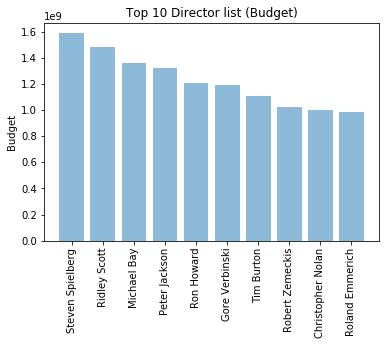

In [14]:
director = (top10_director_by_budget.index)
y_pos = np.arange(len(director))
x_pos = list(top10_director_by_budget)
 
plt.bar(y_pos, x_pos, align='center', alpha=0.5)
plt.xticks(y_pos, director, rotation='vertical')
plt.ylabel('Budget')
plt.title('Top 10 Director list (Budget)')
 
plt.show()

In [15]:
print(top10_director_by_revenue.index[0],"has the max. budget")

Steven Spielberg has the max. budget


<b> Conclusion.</b> <br>
To get an answer a list of the top 10 directors vs. budget is extracted from the dataset. We observe that the director Steven Spielberg has the max. budget.

### Question: Which movie is the most popular own?

The goal is to investigate the most popular movie.

Top 10 of the most popular movies:

In [16]:
tmdb_df_popularity = tmdb_df.groupby('original_title')['popularity'].sum()
top10_movie_by_popularity = tmdb_df_popularity.sort_values(ascending=False).head(10)
top10_movie_by_popularity

original_title
Jurassic World                           32.985763
Mad Max: Fury Road                       28.419936
Interstellar                             24.949134
Guardians of the Galaxy                  14.311205
Insurgent                                13.112507
Captain America: The Winter Soldier      12.971027
Star Wars                                12.037933
John Wick                                11.422751
Star Wars: The Force Awakens             11.173104
The Hunger Games: Mockingjay - Part 1    10.739009
Name: popularity, dtype: float64

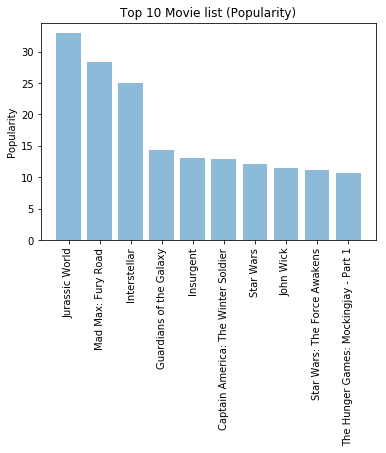

In [17]:
movie = (top10_movie_by_popularity.index)
y_pos = np.arange(len(movie))
x_pos = list(top10_movie_by_popularity)
 
plt.bar(y_pos, x_pos, align='center', alpha=0.5)
plt.xticks(y_pos, movie, rotation='vertical')
plt.ylabel('Popularity')
plt.title('Top 10 Movie list (Popularity)')
 
plt.show()

More details about the popular movie:

In [18]:
tmdb_df.loc[tmdb_df['popularity'].idxmax()]

id                                                                 135397
imdb_id                                                         tt0369610
popularity                                                        32.9858
budget                                                          150000000
revenue                                                        1513528810
original_title                                             Jurassic World
cast                    Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...
homepage                                    http://www.jurassicworld.com/
director                                                  Colin Trevorrow
tagline                                                 The park is open.
keywords                monster|dna|tyrannosaurus rex|velociraptor|island
overview                Twenty-two years after the events of Jurassic ...
runtime                                                               124
genres                          Action

In [19]:
print("The most popular movie is:",tmdb_df.loc[tmdb_df['popularity'].idxmax()].original_title)
print("The director is:",tmdb_df.loc[tmdb_df['popularity'].idxmax()].director)
print("Release year is:",tmdb_df.loc[tmdb_df['popularity'].idxmax()].release_year)

The most popular movie is: Jurassic World
The director is: Colin Trevorrow
Release year is: 2015


<b> Conclusion.</b> <br>
The most popular movie is Jurassic World from the director Colin Trevorrow, released in 2015.

### Question: Are all genres in the top 10 equally divided?

The top 10 list of popular movies:

In [20]:
top10_movie_by_popularity

original_title
Jurassic World                           32.985763
Mad Max: Fury Road                       28.419936
Interstellar                             24.949134
Guardians of the Galaxy                  14.311205
Insurgent                                13.112507
Captain America: The Winter Soldier      12.971027
Star Wars                                12.037933
John Wick                                11.422751
Star Wars: The Force Awakens             11.173104
The Hunger Games: Mockingjay - Part 1    10.739009
Name: popularity, dtype: float64

In [21]:
# We make a list of of imbd_id from the top 10 of popilar movies.
top10_movie_by_popularity_list_of_imdb_id = []

for i in range(0,len(top10_movie_by_popularity)):
    data = tmdb_df[tmdb_df['original_title'] == top10_movie_by_popularity.index[i]]['imdb_id']
    top10_movie_by_popularity_list_of_imdb_id.append(data.iloc[0])
print(top10_movie_by_popularity_list_of_imdb_id)

['tt0369610', 'tt1392190', 'tt0816692', 'tt2015381', 'tt2908446', 'tt1843866', 'tt0076759', 'tt2911666', 'tt2488496', 'tt1951265']


The list of movie genres in the dataset:

In [22]:
genre_list = split_list(tmdb_df['genres'],"|")
print(genre_list)

['Action', 'Adventure', 'Science Fiction', 'Thriller', 'Fantasy', 'Crime', 'Western', 'Drama', 'Family', 'Animation', 'Comedy', 'Mystery', 'Romance', 'War', 'History', 'Music', 'Horror', 'Documentary', 'TV Movie', 'nan', 'Foreign']


In [23]:
list = []
for i in range(0,len(top10_movie_by_popularity_list_of_imdb_id)):
    temp = tmdb_df['imdb_id'] == top10_movie_by_popularity_list_of_imdb_id[i]
    list.append(tmdb_df[temp]['genres'].iloc[0].split('|'))
    
list = sum(list, [])
# Count repeated elements in the list
# ref. https://stackoverflow.com/questions/23240969/python-count-repeated-elements-in-the-list/23240989 
count = Counter(list)

# Transform a Counter object into a Pandas DataFrame
# ref. https://stackoverflow.com/questions/31111032/transform-a-counter-object-into-a-pandas-dataframe
df = pd.DataFrame.from_dict(count, orient='index').reset_index()
df = df.rename(columns={'index':'genre', 0:'count'})
df

,genre,count
0,Action,7
1,Adventure,9
2,Science Fiction,9
3,Thriller,5
4,Drama,1
5,Fantasy,1


<b> Conclusion.</b> <br> The genres are not equally spread. We observe that only 6 genres are present in the top 10 list. Adventure and scientific are the most popular movie genres followed by action, on the third place we have the genre thriller.

### Question: What about the release year of the top 10 popular movies.

In [24]:
# Make a list of release_year and count the number of movies for each release year.
list = []
for i in range(0,len(top10_movie_by_popularity_list_of_imdb_id)):
    temp = tmdb_df['imdb_id'] == top10_movie_by_popularity_list_of_imdb_id[i]
    list.append(tmdb_df[temp]['release_year'].iloc[0])
    
count = Counter(list)

df = pd.DataFrame.from_dict(count, orient='index').reset_index()
df = df.rename(columns={'index':'release_year', 0:'count'})
df

,release_year,count
0,2015,4
1,2014,5
2,1977,1


Most of the movies are from 2014 (5) and 2015 (4) only one, the movie Star Wars, is from 1977.

In [25]:
movies_1977 = tmdb_df.loc[tmdb_df['release_year'] == 1977]

for i in range(0,len(top10_movie_by_popularity_list_of_imdb_id)):
    for j in range(len(movies_1977)):
        if movies_1977['imdb_id'].iloc[j] == top10_movie_by_popularity_list_of_imdb_id[i]:
            print(movies_1977.iloc[j])

id                                                                     11
imdb_id                                                         tt0076759
popularity                                                        12.0379
budget                                                           11000000
revenue                                                         775398007
original_title                                                  Star Wars
cast                    Mark Hamill|Harrison Ford|Carrie Fisher|Peter ...
homepage                http://www.starwars.com/films/star-wars-episod...
director                                                     George Lucas
tagline                      A long time ago in a galaxy far, far away...
keywords                      android|galaxy|hermit|death star|lightsaber
overview                Princess Leia is captured and held hostage by ...
runtime                                                               121
genres                                

<b>Remark:</b> <br>
We notice that most of the popular movies in the top 10 are released in 2014 and 2015. However, we need to make a remark that today more people have the opportunity to watch movies and also there are more channels (cinema, online, ...), which can have impact on the popularity figure.

### Question: what is the total revenue from year 2015.

In [26]:
# select all the movies form 2015
movies_2015 = tmdb_df.loc[tmdb_df['release_year'] == 2015]
print("Total revenue in 2015:",movies_2015['revenue'].sum(),"USD.")
print("Average revenue in 2015:",round(movies_2015['revenue'].mean(),2),"USD.")

Total revenue in 2015: 26762450518 USD.
Average revenue in 2015: 42547616.09 USD.


In [27]:
revenue_list_top10_2015 = []
for i in range(0,len(top10_movie_by_popularity_list_of_imdb_id)):
    temp = tmdb_df['imdb_id'] == top10_movie_by_popularity_list_of_imdb_id[i]
    revenue_list_top10_2015.append(tmdb_df[temp]['revenue'].iloc[0])
print(revenue_list_top10_2015)
print("The total revenue of the 2015 movies in top 10 list:", sum(revenue_list_top10_2015),"USD")

[1513528810, 378436354, 621752480, 773312399, 295238201, 714766572, 775398007, 78739897, 2068178225, 752100229]
The total revenue of the 2015 movies in top 10 list: 7971451174 USD


In [28]:
print("The top 10 movies of year 2015,",df['count'][0],"movies, represents,", round(100*sum(revenue_list_top10_2015)/movies_2015['revenue'].sum()),"% of the total revenue in 2015. We had in total",len(movies_2015),"movies in 2015.")

The top 10 movies of year 2015, 4 movies, represents, 30.0 % of the total revenue in 2015. We had in total 629 movies in 2015.


<b> Conclusion.</b> <br> The total revenue in 2015 was 26762450518 USD, with an average of 42547616.09 USD. We also observe that the 4 most popular movies in 2015 represent 30% of the total revenue (note: in total we have 629 movies in 2015).  

### Question: Is there something to tell about: <br> - popularity vs. budget <br> - popularity vs. revenue

We like to get an answer if popular movies have a higher budget and a higher revenue.

In [29]:
tmdb_df_popularity = tmdb_df.groupby('original_title')['popularity'].sum()
movie_by_popularity = tmdb_df_popularity.sort_values(ascending=False)

In [30]:
# We make a list of imbd_id
movie_by_popularity_list_of_imdb_id = []

for i in range(0,len(movie_by_popularity)):
    data = tmdb_df[tmdb_df['original_title'] == movie_by_popularity.index[i]]['imdb_id']
    movie_by_popularity_list_of_imdb_id.append(data.iloc[0])
    
# We make a list of budget 
movie_by_popularity_list_of_budget = []

for i in range(0,len(movie_by_popularity)):
    data = tmdb_df[tmdb_df['original_title'] == movie_by_popularity.index[i]]['budget']
    movie_by_popularity_list_of_budget.append(data.iloc[0])  
    
# We make a list of revenue
movie_by_popularity_list_of_revenue = []

for i in range(0,len(movie_by_popularity)):
    data = tmdb_df[tmdb_df['original_title'] == movie_by_popularity.index[i]]['revenue']
    movie_by_popularity_list_of_revenue.append(data.iloc[0])
    
# make a dataframe
# https://stackoverflow.com/questions/30522724/take-multiple-lists-into-dataframe
lst1 = movie_by_popularity_list_of_imdb_id
lst2 = movie_by_popularity_list_of_budget
lst3 = movie_by_popularity_list_of_revenue
lst4 = movie_by_popularity.values
df = pd.DataFrame(
    {'imdb_id': lst1,
     'budget USD': lst2,
     'revenue USD': lst3,
     'popularity': lst4
    })
df.head(10)

,budget USD,imdb_id,popularity,revenue USD
0,150000000,tt0369610,32.985763,1513528810
1,150000000,tt1392190,28.419936,378436354
2,165000000,tt0816692,24.949134,621752480
3,170000000,tt2015381,14.311205,773312399
4,110000000,tt2908446,13.112507,295238201
5,170000000,tt1843866,12.971027,714766572
6,11000000,tt0076759,12.037933,775398007
7,20000000,tt2911666,11.422751,78739897
8,200000000,tt2488496,11.173104,2068178225
9,125000000,tt1951265,10.739009,752100229


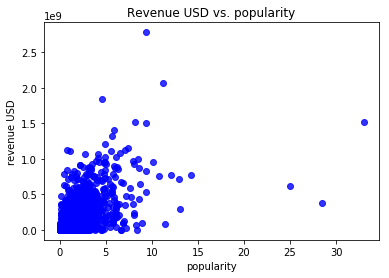

In [31]:
g = sns.regplot(x="popularity", y="revenue USD", data=df, color="b", fit_reg=False)
plt.title('Revenue USD vs. popularity')
plt.show()

In [32]:
# Calculation Pearson’s correlation coefficient r
r,p = pearsonr(lst3,lst4)
print(r)

0.65640585067


If the Pearson’s correlation coefficient is calculted we obtain a moderate (to strong) relationship between revenue and popularity.

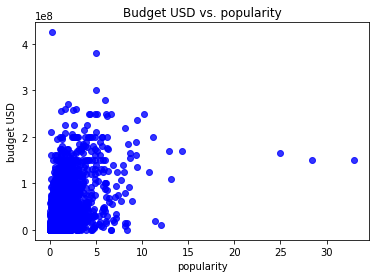

In [33]:
sns.regplot(x="popularity", y="budget USD", data=df, color="b", fit_reg=False)
plt.title('Budget USD vs. popularity')
plt.show()

In [34]:
# Calculation Pearson’s correlation coefficient r
r,p = pearsonr(lst2,lst4)
print(r)

0.54449240773


If the Pearson’s correlation coefficient is calculted we obtain a moderate relationship between revenue and popularity.

<b>Conclusion: </b> <br>
There is a moderate relationship between budget/revenue and popularity. However, a final conclusion can in my opinion not made there it is unclear how popularity is measured. According to: https://www.themoviedb.org/talk/56e614a2c3a3685aa4008121, popularity is a value that gets updated daily and takes a number of things into account like views, number of user ratings/watchlist/favourite additions and release date. Another link: https://developers.themoviedb.org/3/getting-started/popularity explains what is included in this figure. In my opinion, however there is a correlation there is no causality there popularity is not a good measure and can be manipulated, for example higher budget movies can spend more money to advertise the movie.  

### Question: Can we tell something about revenue vs. movie genre.

The goal is to estimate the revenue versus movie genre.

In [35]:
# Extraction of the list.
movies_2015.head(5)['genres']

0    Action|Adventure|Science Fiction|Thriller
1    Action|Adventure|Science Fiction|Thriller
2           Adventure|Science Fiction|Thriller
3     Action|Adventure|Science Fiction|Fantasy
4                        Action|Crime|Thriller
Name: genres, dtype: object

In [36]:
imdb_thriller_list = []
imdb_drama_list = []
imdb_comedy_list = []

for i in range(0,len(tmdb_df)):
    
    the_list = str(tmdb_df.iloc[i].genres).split("|")
    for j in range(0,len(the_list)):
        
        if the_list[j] == 'Thriller':
            imdb_thriller_list.append(tmdb_df.iloc[i].imdb_id)
        elif the_list[j] == 'Drama':
            imdb_drama_list.append(tmdb_df.iloc[i].imdb_id)
        elif the_list[j] == 'Comedy':
            imdb_comedy_list.append(tmdb_df.iloc[i].imdb_id)

# ref. https://www.saltycrane.com/blog/2008/01/how-to-find-intersection-and-union-of/
print("We have", len(set(imdb_thriller_list) & set(imdb_drama_list)),"movies with thriller and drama tag.")
print("We have",len(set(imdb_thriller_list) & set(imdb_comedy_list)),"movies with thriller and comedy tag.")
print("We have",len(set(imdb_drama_list) & set(imdb_comedy_list)),"movies with drama and comedy tag.")
print("We have",len(set(imdb_drama_list) & set(imdb_comedy_list) & set(imdb_thriller_list)),"movies with drama, comedy and thriller tag.")

We have 1260 movies with thriller and drama tag.
We have 260 movies with thriller and comedy tag.
We have 1223 movies with drama and comedy tag.
We have 73 movies with drama, comedy and thriller tag.


The example above shows that however we extract 3 complete different genres, i.e. drama, comedy and thriller, from the dataset there are still movies that have these 3 genres common (73 in the dataset). My opinion it is difficult to obtain a correct answer on this question there the same movie can have different genres. This is a limitation of the dataset, there we have no clear seperation between the genres.  

# References

- Stackoverflow, https://stackoverflow.com
- Kaggle, https://www.kaggle.com

# [EOF]